 # Visualization of The MSCI World Index

In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

In [3]:
# Data cleaning

cwd = os.getcwd()
df = pd.read_excel(cwd+"/Data.xlsx",sheet_name="Sheet1")
labels = pd.DatetimeIndex(df['Date']).year.to_list()
df["Year"] = labels
df = df.drop(53)
df = df.iloc[::-1]

In [4]:
# Plot details: bins, color palette and tick configuration

created_bins = []
x = -50
for item in range (0,11):
    created_bins.append(x)
    x = x + 10
    
colors = []
for item in range(0,53):
    colors.append("blue")
   
yticklabels = ["",]
n=1
for item in range (0,14):
    item = f"{n} " + "({0:.0f})%".format(100/53*n)
    yticklabels.append(item)
    n += 1    
    
yticks = []
n = 0
for item in range (0,15):
    item = n
    n += 1
    yticks.append(item)

In [5]:
# Statistics

pos_years = len(df.loc[df["% Change"] > 0])
neg_years = len(df.loc[df["% Change"] < 0])
mean = '{:.1f}%'.format(df["% Change"].mean())
minimum = '{:.1f}%'.format(df["% Change"].min())
maximum = '{:.1f}%'.format(df["% Change"].max())
std = '{:.1f}%'.format(math.sqrt(df["% Change"].var()))
skew = '{:.1f}%'.format(df["% Change"].skew())
kurt = '{:.2f}'.format(df["% Change"].kurtosis())
qua25 = '{:.1f}%'.format(df["% Change"].quantile(0.25))
qua50 = '{:.1f}%'.format(df["% Change"].quantile(0.50))
qua75 = '{:.1f}%'.format(df["% Change"].quantile(0.75))

In [6]:
# Statistics table

stats = f"""
Time Period:                              1970-2022
Index:                                        MSCI World Total Return Index
Currency:                                   USD
Number of years:                       53
Number of positive years:         {pos_years}
Number of positive years:         {neg_years}
Mean:                                         {mean}
Minimum:                                   {minimum}
25%-Quartile:                             {qua25}
50%-Quartile:                             {qua50}
75%-Quartile:                             {qua75}
Maximum:                                   {maximum}
Standart dev.:                             {std}
Skewness:                                  {skew}
Kurtosis:                                      {kurt}
"""

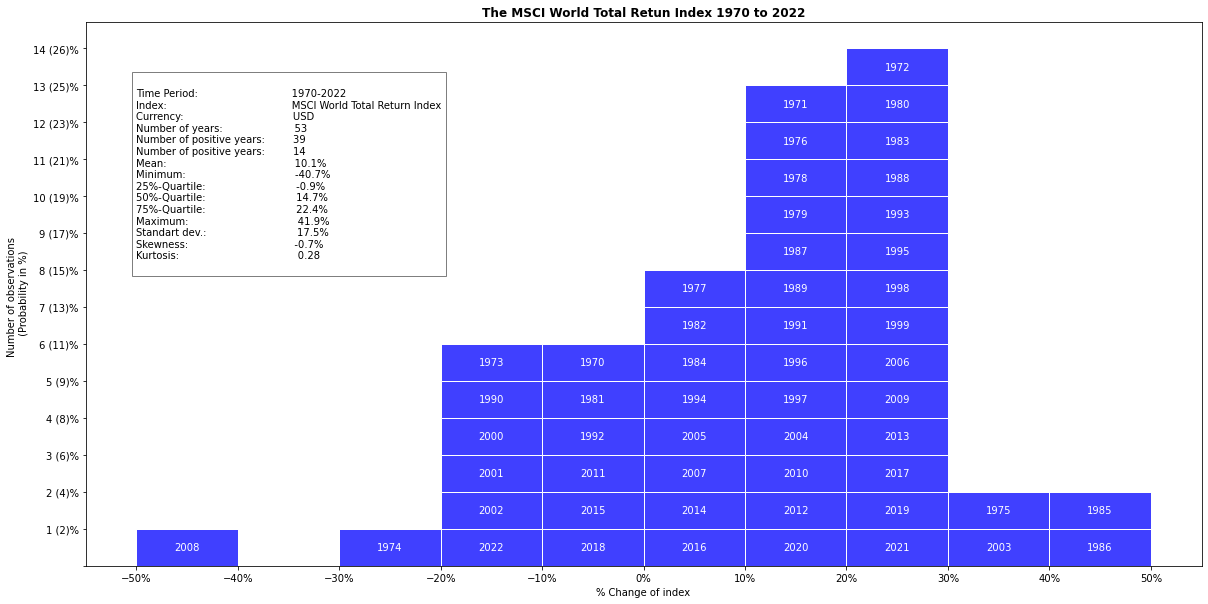

In [7]:
# Plot

ax = sns.histplot(data=df,bins=created_bins ,x=df["% Change"], hue="Year", multiple="stack", legend=False, palette=colors, edgecolor="white")

i = 0
for p in ax.patches:
    if p.get_height()>0: 
        ax.text(p.get_x() + p.get_width()/2, p.get_y()+1/2, df.Year[i],
            ha='center', va='center', color="white")
        i+=1

plt.ylabel("Number of observations \n (Probability in %)")
plt.xlabel("% Change of index")
plt.title("The MSCI World Total Retun Index 1970 to 2022", fontweight="bold")
ax.yaxis.set_major_locator(ticker.FixedLocator(yticks))
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(100.0))
ax.set_yticklabels(yticklabels)

text = plt.text(-50, 8, stats, fontsize = 10, 
           bbox = dict(facecolor = "white", edgecolor = 'black', alpha = 0.5))

plt.gcf().set_size_inches(20, 10)

plt.show()